In [63]:
# helper libraries
import warnings        # to ignore unnecessary warnings
warnings.filterwarnings("ignore", category = FutureWarning)

import numpy as np      # linear algebra
import pandas as pd     # data manipulation

import seaborn as sns      # visualization tool
import matplotlib.pyplot as plt       # viz tool also

from scipy import stats     # statistics functions
from scipy.stats import norm, skewnorm   # skewness function

from sklearn.linear_model import LinearRegression
# Warning 
from yellowbrick.regressor import ResidualsPlot 

# Exercícios de Aprendizagem

**01.** Inúmeros estudos já mostraram que os líquens (determinadas plantas compostas de algas e fungos) são excelentes bioindicadores de poluição do ar. O artigo “The epiphytic lichen hypogymnia physodes as a biomonitor of atmospheric nitrogen and sulphur deposition in norway” (Environmental Monitoring and Assessment, 1993: p. 27-47) apresenta os dados a seguir (reproduzidos de um gráfico) sobre x = deposição de $NO_3$ em meio úmido (gN/m2) e y = líquens (% peso seco): 

In [124]:
dados_v1 = {'x':[0.05,0.10,0.11,0.12,0.31,0.37,0.42,0.58,0.68,0.68,0.73,0.85,0.92],
            'y':[0.48,0.55,0.48,0.50,0.58,0.52,1.02,0.86,0.86,1.00,0.88,1.04,1.70]}

In [125]:
df_dados_v1 = pd.DataFrame(data = dados_v1)

In [126]:
df_dados_v1.head(50)

,x,y
0,0.05,0.48
1,0.10,0.55
2,0.11,0.48
3,0.12,0.50
4,0.31,0.58
5,0.37,0.52
6,0.42,1.02
7,0.58,0.86
8,0.68,0.86
9,0.68,1.00


## 1. Passo: calculando $\sum{x_i}$

In [127]:
df_dados_v1['x'].sum()  

5.92

## 2. Passo: calculando $\sum{y_i}$

In [128]:
df_dados_v1['y'].sum()

10.469999999999999

## 3. Passo: adicionando a coluna $\rightarrow x^2$

In [129]:
df_dados_v1['x^2'] = df_dados_v1['x'].apply(lambda x: x**2)

In [131]:
df_dados_v1.head(50)

,x,y,x^2
0,0.05,0.48,0.0025
1,0.10,0.55,0.0100
2,0.11,0.48,0.0121
3,0.12,0.50,0.0144
4,0.31,0.58,0.0961
5,0.37,0.52,0.1369
6,0.42,1.02,0.1764
7,0.58,0.86,0.3364
8,0.68,0.86,0.4624
9,0.68,1.00,0.4624


## 4. Passo: adicionando as colunas $\rightarrow y^2$ e $ x \cdot y $

In [132]:
df_dados_v1['y^2'] = df_dados_v1['y'].apply(lambda x: x**2)
df_dados_v1['x*y'] = df_dados_v1['x'] * df_dados_v1['y']
df_dados_v1.head(50)

,x,y,x^2,y^2,x*y
0,0.05,0.48,0.0025,0.2304,0.0240
1,0.10,0.55,0.0100,0.3025,0.0550
2,0.11,0.48,0.0121,0.2304,0.0528
3,0.12,0.50,0.0144,0.2500,0.0600
4,0.31,0.58,0.0961,0.3364,0.1798
5,0.37,0.52,0.1369,0.2704,0.1924
6,0.42,1.02,0.1764,1.0404,0.4284
7,0.58,0.86,0.3364,0.7396,0.4988
8,0.68,0.86,0.4624,0.7396,0.5848
9,0.68,1.00,0.4624,1.0000,0.6800


In [81]:
y = df_dados_v1.iloc[:,1].values
x = df_dados_v1.iloc[:,0].values

In [82]:
x = x.reshape(-1,1)
modelo = LinearRegression()
modelo.fit(x,y)

LinearRegression()

### **A equação**

## $$Y_i = β_1\cdot x_i + β_0$$  

In [83]:
modelo.intercept_    # valor quando x = 0,  y = ?, ou seja, onde y intercepta x quando na origem

0.3651043318760429

**Conclusão:** Valor do $β_0$ = 0,3651

In [84]:
modelo.coef_    # inclinação, coeficiente angular  

array([0.9668317])

**Conclusão:** Valor do $β_1$ = 0,9668

In [85]:
# r_correlacao = np.corrcoef(x,y)   # coeficiente de correlação
# r_correlacao

**Conclusão:** O valor de $R$ = 0.847 e $R^2$ = 71,74%

## Resposta: A equação de regressão é $Y_i = 0,966x + 0,366$

**b)** Quanto vale $Y_i$ para $x$ = 0,5?

In [86]:
modelo.predict([[0.5]])

array([0.84852018])

**Resposta:** $Y_i$ = 0,848

### Gráfico da equação

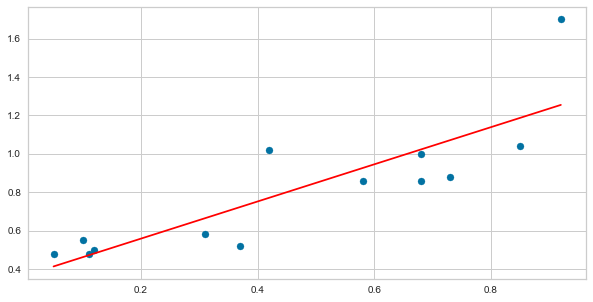

In [87]:
plt.figure(figsize=(10,5));
plt.scatter(x,y)
plt.plot(x, modelo.predict(x), color = 'red');

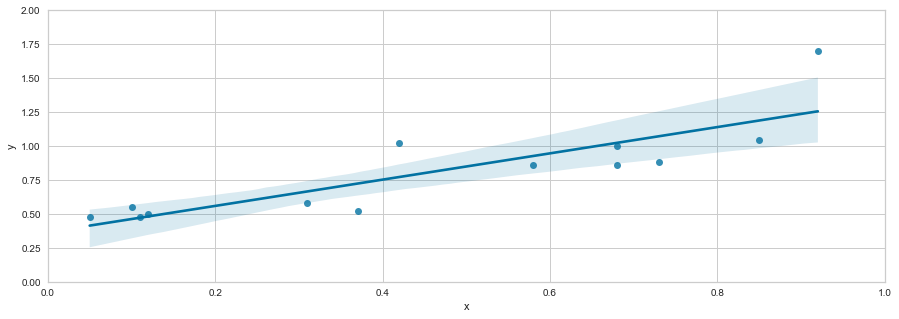

In [88]:
plt.figure(figsize=(15,5));
sns.regplot(x =  'x' , y = 'y' , data = df_dados_v1 );
plt.ylim(0,2)
plt.xlim(0,1)
plt.show();

### Essas linhas paralelas são os intervalos de confiança

# página 94 - Exemplo 02

In [89]:
dados = {'x':[125.3,98.2,201.4,147.3,145.9,124.7,112.2,120.2,161.2,
                178.9,159.5,145.8,75.1,151.4,144.2,125.0,198.8,132.5,159.6,110.7],
         'y':[77.9,76.8,81.5,79.8,78.2,78.3,77.5,77.0,80.1,80.2,79.9,79.0,76.7,78.2,79.5,
             78.1,81.5,77.0,79.0,78.6]}

In [90]:
df_raw = pd.DataFrame(data = dados)

In [91]:
df_raw.head()

,x,y
0,125.3,77.9
1,98.2,76.8
2,201.4,81.5
3,147.3,79.8
4,145.9,78.2


In [92]:
y = df_raw.iloc[:,1].values
x = df_raw.iloc[:,0].values

In [93]:
r_correlacao = np.corrcoef(x,y)
r_correlacao

array([[1.       , 0.8943937],
       [0.8943937, 1.       ]])

In [94]:
x = x.reshape(-1,1)
modelo = LinearRegression()
modelo.fit(x,y)

LinearRegression()

In [95]:
modelo.intercept_    # valor quando x = 0,  y = ?, ou seja, onde y intercepta x quando na origem

72.95854697348372

In [96]:
modelo.coef_    # inclinação, coeficiente angular

array([0.04103377])

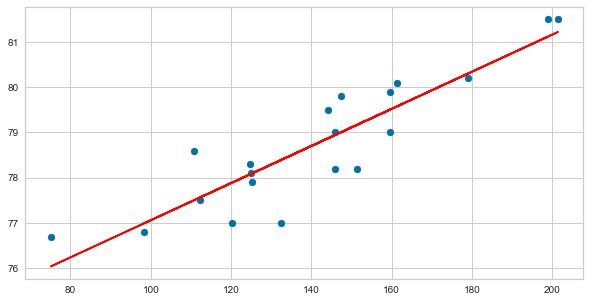

In [97]:
plt.figure(figsize=(10,5));
plt.scatter(x,y)
plt.plot(x, modelo.predict(x), color = 'red');

(0.0, 210.0)

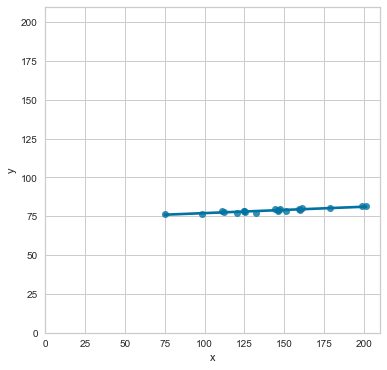

In [113]:
plt.figure(figsize=(6,6));
sns.regplot(x =  'x' , y = 'y' , data = df_raw );
plt.ylim(0,210)
plt.xlim(0,210)

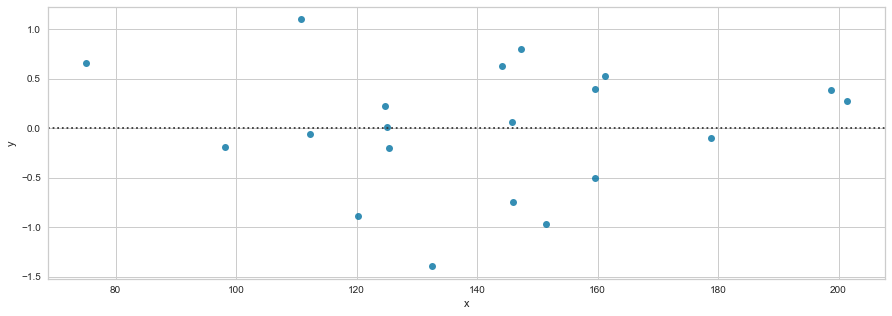

In [99]:
plt.figure(figsize=(15,5));
sns.residplot(df_raw['x'], df_raw['y']);       # resíduos

<hr>

In [65]:
dados_v2 = {'meses_(nº)':[1,2,3,4,5,6,7,8], 'consumo_(UN)':[450,460,470,490,485,510,505,530]}

In [66]:
df_dados_v2 = pd.DataFrame(data = dados_v2)
df_dados_v2.head()

,meses_(nº),consumo_(UN)
0,1,450
1,2,460
2,3,470
3,4,490
4,5,485


Fazendo direto no algoritmo

In [118]:
y_v2 = df_dados_v2.iloc[:,1].values
x_v2 = df_dados_v2.iloc[:,0].values

In [119]:
R_correlacao_v2 = np.corrcoef(x_v2,y_v2)
R_correlacao_v2

array([[1.        , 0.97230559],
       [0.97230559, 1.        ]])

In [68]:
x_v2 = x_v2.reshape(-1,1)
modelo_v2 = LinearRegression()
modelo_v2.fit(x_v2,y_v2)

LinearRegression()

In [69]:
modelo_v2.intercept_

439.2857142857143

In [70]:
modelo_v2.coef_

array([10.71428571])

In [71]:
# correlacao = np.corrcoef(x_v2, y_v2)
# correlacao

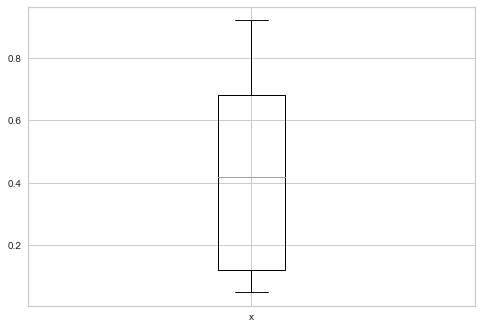

In [100]:
df_dados_v1.boxplot(column='x')
plt.show()

<AxesSubplot:xlabel='x', ylabel='Density'>

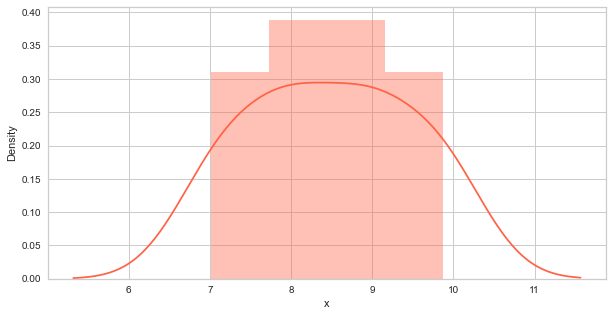

In [116]:
plt.figure(figsize=(10,5));
sns.distplot(df_dados_v1['x'], color='tomato')

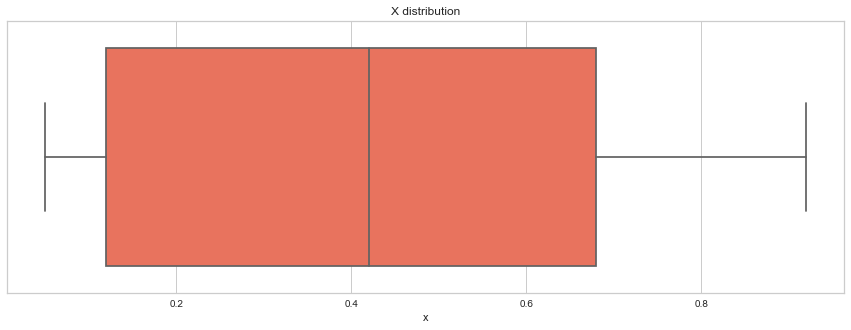

In [102]:
plt.figure(figsize=(15,5))
sns.boxplot(df_dados_v1['x'], color="tomato");
plt.title("X distribution");

# página 91 - Exemplo 01

In [103]:
dados_v1 = {'x':[7.01,7.11,7.12,7.24,7.94,7.94,8.04,8.05,8.07,8.90,8.94,8.95,8.97,8.98,9.85,9.86,9.86,9.87],
            'y':[60,67,66,52,50,45,52,48,40,23,20,40,31,26,9,22,13,7]}

In [104]:
df_dados_v1 = pd.DataFrame(data = dados_v1)

In [105]:
df_dados_v1.head(50)

,x,y
0,7.01,60
1,7.11,67
2,7.12,66
3,7.24,52
4,7.94,50
5,7.94,45
6,8.04,52
7,8.05,48
8,8.07,40
9,8.90,23


In [106]:
y = df_dados_v1.iloc[:,1].values
x = df_dados_v1.iloc[:,0].values

In [107]:
x = x.reshape(-1,1)
modelo = LinearRegression()
modelo.fit(x,y)

LinearRegression()

### **A equação**

## $$Y_i = β_1\cdot x_i + β_0$$  

In [108]:
modelo.intercept_    # valor quando x = 0,  y = ?, ou seja, onde y intercepta x quando na origem

190.26829324779692

**Conclusão:** Valor do $β_0$ = 0,3651

In [109]:
modelo.coef_    # inclinação, coeficiente angular  

array([-18.03424544])

**Conclusão:** Valor do $β_1$ = 0,9668

## Resposta: A equação de regressão é $Y_i = 0,966x + 0,366$

**b)** Quanto vale $Y_i$ para $x$ = 0,5?

In [110]:
modelo.predict([[0.5]])

array([181.25117053])

**Resposta:** $Y_i$ = 0,848

### Gráfico da equação

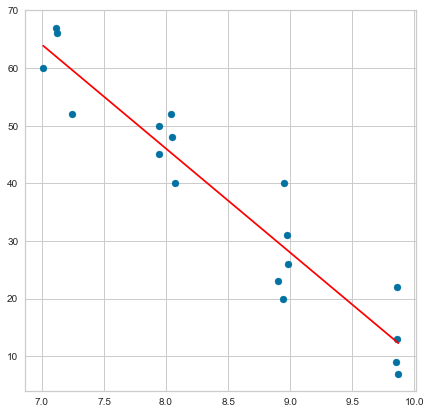

In [111]:
plt.figure(figsize=(7,7));
plt.scatter(x,y)
plt.plot(x, modelo.predict(x), color = 'red');